# Competencia: Santander Customer Satisfaction

Desde los cargos de atención al cliente, hasta en los cargos directivos la satisfacción del cliente es una de las principales métricas de éxito. Los clientes insatisfechos no se mantienen por mucho tiempo, y mas aún, los clientes insatisfechos no demuestran su insatisfacción sino hasta que ya han dejado la compañia.

El Banco Santander le esta solciitando a la comunidad de Kaggle que le ayude a identificar a los clientes insatisfechos en una etapa temprana de la relación comercial. Hacerlo le permitirá a Santander tomar medidas preventivas para mejorar la satisfacción de sus clientes antes de que sea demasiado tarde.

En esta competencia usted trabajrá con cientos de características anonimizadas para predecir si un cliente está o no satisfecho con su experiencia bancaria.

## Grupo de trabajo

- John Franklin Gonzalez Gamboa - 201725981
- Jorge Eduardo Rodriguez Cardozo - 200711501
- German Augusto Carvajal Murcia - 201313516

**Nota: para proceder con este documento es pre-requisito haber ejecutado los notebooks** **`Notebook Santander - Limpieza de datos` y `Notebook Santander - Outlier`**  **. Adicionalmente, la ruta de la carpeta `Santander` debe mantenerse inalterada entre todos los documentos**

In [2]:
import os
os.chdir(os.getcwd()+'/Santander')

## Carga de la información

Para la realización del balanceo de la base de datos se carga la base de datos resultado del proceso de detección de datos atípicos de la base de entrenamiento (Notebook `Notebook Santander - Outlier`). Asimismo, se importan las librerias básicas necesarias para realizar el estudio.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Data_train =pd.read_csv('Data_train.csv')

Luego del proceso de eliminación de valores atípicos, se tiene una base de datos de entrenamiento con 67932 registros y 315 caracteristicas independientes que pueden incluirse como potenciales predictoras de la satisfacción de los clientes. El procedimiento de datos atípicos puede consultarse detalladamente en el notebook `Notebook Santander - Oytlier`. 

In [4]:
X=Data_train.loc[:, Data_train.columns!='TARGET']
y=Data_train.TARGET.copy()
print('Features: ',X.shape)
print('Target: ',y.shape)

Features:  (67932, 315)
Target:  (67932,)


## Balanceo de la base de datos

La base de datos de entrenamiento sin preprocesamiento presentaba un desbalanceo insgnificativo con una representación de la clase positiva (clientes insatisfechos) de un 4%. Luego de los procesos de limpieza y detección de datos atípicos el comportamiento en la composición de lod individuos se mantiene en las mismas proporciones, como puede apreciarse en las siguientes ilustraciones.

Considerando la sensibilidad de los modelos de clasificación que se entrenarán, es necesario realizar un rebalanceo de las muestras de cada grupo para aumentar la representatividad de la clase positiva.

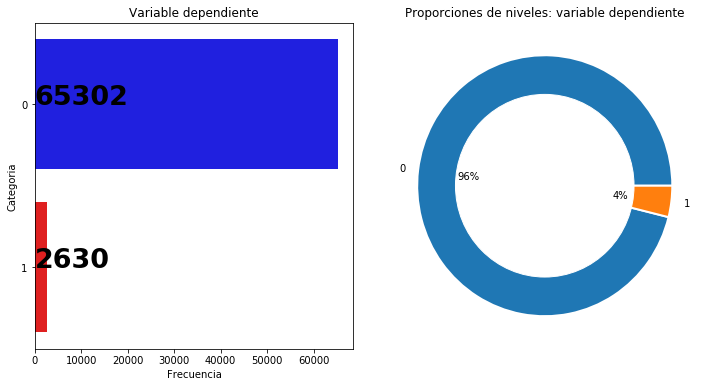

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = Data_train["TARGET"],palette=["b","r"])
for i,j in enumerate(Data_train["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Variable dependiente")
plt.ylabel('Categoria')
plt.xlabel('Frecuencia')
plt.subplot(122)
plt.pie(Data_train["TARGET"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title('Proporciones de niveles: variable dependiente')
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .1)
plt.show()

Para efectuar el rebalanceo de la muestra se opta por utilizar estrategias de sobre y sub-muestreo de forma simultanea. En primer lugar, para ampliar la representatividad de la clase positiva se utiliza la técnica _SMOTE_ para crear observaciones sintéticas contenidas dentro del casco convexo creado por los puntos limites del conjunto de observaciones de la muestra original. 

Por otro lado, el proceso de sub-muestreo se aplica con _Edited Nearest Neighbors_ como un procedimiento de balanceo y limpieza de la base de datos que simplifique la calibración del algoritmo de clasificación. Las nuevas proporciones de la muestra son dejadas a libertad de los resultados de la aplicación de cada uno de los procesos de forma simultanea para evitar inconsistencias o eliminaciones innecesarias de registros.

In [7]:
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTEENN

enn = EditedNearestNeighbours(random_state=123, n_jobs=-1)
sm = SMOTE(random_state=123, n_jobs=-1)
sme = SMOTEENN(ratio='auto',random_state=123, smote=sm, enn=enn)

In [8]:
X_res, y_res = sme.fit_sample(X, y)

Tras aplicar las técnicas descritas anteriormente, se cuenta con una base de datos más balanceada en la cual la clase positiva representa el 44.8% de la muestra frente al 4% original. Cabe resaltar que el balanceo sólo se ve representado en el sobre-muestreo inducido por _SMOTE_, puesto que el proceso de _ENN_ no logro seleccionar ningun dato de la categoría base que fuese atípico dentro de su conjunto. Este último resultado soporta el proceso de eliminación de datos atípicos desarrollado anteriormente.

In [9]:
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 65302, 1: 53026})


In [15]:
X_res.shape

(118328, 315)

Finalmente, con una base de datos de entrenamiento balanceada y apropiada para la calibración de los algoritmos se procede a guardar los registros para ser usados en el entrenamiento de los modelos.

In [8]:
X_res=pd.DataFrame(X_res,columns=X.columns)
y_res=pd.DataFrame(y_res,columns=['TARGET'])
X_res.to_csv('Features.csv',index=False)
y_res.to_csv('Target.csv',index=False)

In [32]:
import os
Target = pd.read_csv('Target.csv')

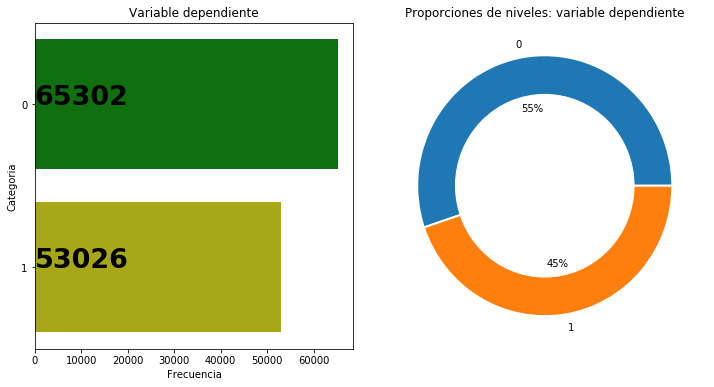

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = Target["TARGET"],palette=["g","y"])
for i,j in enumerate(Target["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Variable dependiente")
plt.ylabel('Categoria')
plt.xlabel('Frecuencia')
plt.subplot(122)
plt.pie(Target["TARGET"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title('Proporciones de niveles: variable dependiente')
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .1)
plt.show()